# Predicting Hotel Cancellations

## 🏨 Background

You are supporting a hotel with a project aimed to increase revenue from their room bookings. They believe that they can use data science to help them reduce the number of cancellations. This is where you come in! 

They have asked you to use any appropriate methodology to identify what contributes to whether a booking will be fulfilled or cancelled. They intend to use the results of your work to reduce the chance someone cancels their booking.

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')


hotels = pd.read_csv("data/hotel_bookings.csv")
hotels

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Not_Canceled
1,INN00002,2.0,0.0,2.0,3.0,Not Selected,0.0,Room_Type 1,5.0,2018.0,11.0,6.0,Online,0.0,0.0,0.0,106.68,1.0,Not_Canceled
2,INN00003,1.0,0.0,2.0,1.0,Meal Plan 1,0.0,Room_Type 1,1.0,2018.0,2.0,28.0,Online,0.0,0.0,0.0,60.00,0.0,Canceled
3,INN00004,2.0,0.0,0.0,2.0,Meal Plan 1,0.0,Room_Type 1,211.0,2018.0,5.0,20.0,Online,0.0,0.0,0.0,100.00,0.0,Canceled
4,INN00005,2.0,0.0,1.0,1.0,Not Selected,0.0,Room_Type 1,48.0,2018.0,4.0,11.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3.0,0.0,2.0,NaN,Meal Plan 1,0.0,NaN,85.0,2018.0,8.0,3.0,Online,NaN,0.0,0.0,167.80,1.0,Not_Canceled
36271,INN36272,2.0,0.0,1.0,3.0,Meal Plan 1,0.0,Room_Type 1,228.0,2018.0,10.0,17.0,Online,0.0,0.0,0.0,90.95,2.0,Canceled
36272,INN36273,2.0,0.0,2.0,6.0,Meal Plan 1,0.0,Room_Type 1,148.0,2018.0,7.0,1.0,Online,0.0,0.0,0.0,98.39,2.0,Not_Canceled
36273,INN36274,2.0,0.0,0.0,3.0,Not Selected,0.0,Room_Type 1,63.0,2018.0,4.0,21.0,Online,0.0,0.0,0.0,94.50,0.0,Canceled


## The Challenge

* Use your skills to produce recommendations for the hotel on what factors affect whether customers cancel their booking.

## Time is ticking. Good luck! 

### Data Validation

The dataset contained 36,275 rows and 19 columns. The columns  'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',  'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date'' , 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', and  'avg_price_per_room', 'no_of_special_requests' were converted from float to integer.  

The columns 'type_of_meal_plan',  'room_type_reserved',  'market_segment_type, and 'avg_price_per_room' had 526, 1,171, 1,512 and 460 missing values respectively. For  'type_of_meal_plan', the missing values were replaced with "Not Selected" while the others were dropped as they don't seem to affect the data. None of the rows were duplicated and the total remaining rows were 33,215.

For the categorical columns, 'type_of_meal_plan' had 4 categories, 'room_type_reserved' ranged from Type 1 to 7, 'market segment type' had 5 categories while 'required_car_parking_space', 'repeated_guest', and 'booking_status' are boolean.


In [185]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          35862 non-null  float64
 2   no_of_children                        35951 non-null  float64
 3   no_of_weekend_nights                  35908 non-null  float64
 4   no_of_week_nights                     35468 non-null  float64
 5   type_of_meal_plan                     35749 non-null  object 
 6   required_car_parking_space            33683 non-null  float64
 7   room_type_reserved                    35104 non-null  object 
 8   lead_time                             35803 non-null  float64
 9   arrival_year                          35897 non-null  float64
 10  arrival_month                         35771 non-null  float64
 11  arrival_date   

In [186]:
hotels.shape

(36275, 19)

In [187]:
hotels.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [188]:
# converting the float datasets to int64
for col in hotels.columns:
    if col == 'avg_price_per_room':
        pass
    else:
        if hotels[col].dtype == 'float64':
            hotels[col] = pd.to_numeric(hotels[col], errors='coerce').fillna(0).astype('int64')

In [189]:
hotels.isna().sum()

Booking_ID                                 0
no_of_adults                               0
no_of_children                             0
no_of_weekend_nights                       0
no_of_week_nights                          0
type_of_meal_plan                        526
required_car_parking_space                 0
room_type_reserved                      1171
lead_time                                  0
arrival_year                               0
arrival_month                              0
arrival_date                               0
market_segment_type                     1512
repeated_guest                             0
no_of_previous_cancellations               0
no_of_previous_bookings_not_canceled       0
avg_price_per_room                       460
no_of_special_requests                     0
booking_status                             0
dtype: int64

In [190]:
# we can replace the NAN meal plan with Non selected
hotels['type_of_meal_plan'] = hotels['type_of_meal_plan'].fillna('Not Selected')

hotels['type_of_meal_plan'].head()

0    Not Selected
1    Not Selected
2     Meal Plan 1
3     Meal Plan 1
4    Not Selected
Name: type_of_meal_plan, dtype: object

In [191]:
hotels = hotels.dropna(subset=['room_type_reserved', 'market_segment_type', 'avg_price_per_room'])
hotels.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [192]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33215 entries, 1 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            33215 non-null  object 
 1   no_of_adults                          33215 non-null  int64  
 2   no_of_children                        33215 non-null  int64  
 3   no_of_weekend_nights                  33215 non-null  int64  
 4   no_of_week_nights                     33215 non-null  int64  
 5   type_of_meal_plan                     33215 non-null  object 
 6   required_car_parking_space            33215 non-null  int64  
 7   room_type_reserved                    33215 non-null  object 
 8   lead_time                             33215 non-null  int64  
 9   arrival_year                          33215 non-null  int64  
 10  arrival_month                         33215 non-null  int64  
 11  arrival_date   

In [193]:
hotels.duplicated().sum()

0

In [194]:
hotels.shape

(33215, 19)

# Exploratory Data Analysis

The data started in 2017 and ends in 2018. Although 2017 has lesser amount of visitors, the monthly bookings were similarly distributed.

The target variable, the booking status shows a 32.8% cancellation rate. Investigating further, cancelation whether the visitors had children or not. Months with high bookings had corresponding high cancelations, except for January and December. The average price per room ($103.4) does not affect cancellation. 

While a good number of visitors do not select a meal type, Meal types 1 and 2 are the only options by customers. However, meal plan has no effect on cancelation. The same is true for the room type selected.

People who require parking space usually do not cancel their reservations. The same is true for repeated guests. For the market segment type, visitors in the Corporate segment rarely cancel their bookings while those in complementary segments never cancel.

People with lower lead days usually don't cancel compared to those with higher lead time.and most cancellations are related with high weekend nights. Also, People with more than 2 special request never cancel their bookings and People who have canceled once before never come back.


In [195]:
hotels.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,33215.0,1.830288,0.542368,0.0,2.000,2.00,2.0,4.0
no_of_children,33215.0,0.104441,0.402643,0.0,0.000,0.00,0.0,10.0
no_of_weekend_nights,33215.0,0.803553,0.870856,0.0,0.000,1.00,2.0,6.0
no_of_week_nights,33215.0,2.157429,1.428741,0.0,1.000,2.00,3.0,17.0
required_car_parking_space,33215.0,0.028872,0.167451,0.0,0.000,0.00,0.0,1.0
lead_time,33215.0,84.178263,85.979067,0.0,15.000,56.00,125.0,443.0
arrival_year,33215.0,2017.819750,0.384401,2017.0,2018.000,2018.00,2018.0,2018.0
arrival_month,33215.0,7.429505,3.065387,1.0,5.000,8.00,10.0,12.0
arrival_date,33215.0,15.163812,8.976347,0.0,7.000,15.00,23.0,31.0
repeated_guest,33215.0,0.025802,0.158545,0.0,0.000,0.00,0.0,1.0


Creating some useful functions beforehand.

In [196]:
# to display the count of each bar
def count_label(ax):
    for i in ax.containers:
        ax.bar_label(i, labels = [str(i.get_height()) for i in i.get_children()])

# to display the percentage of each bar
def count_pct(ax, total):
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size=12)

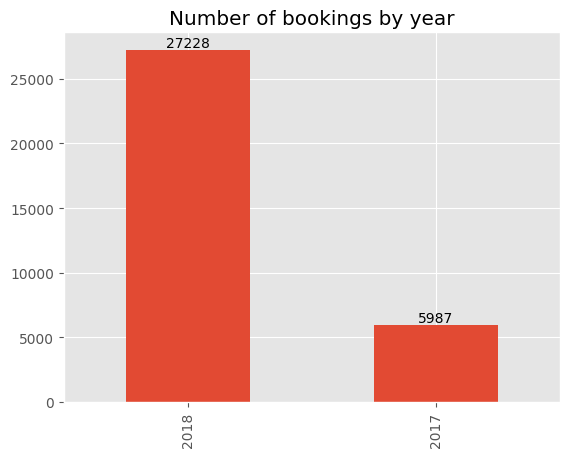

In [197]:
# Number of hotel visitors per year?
a = hotels.arrival_year.value_counts().plot(kind='bar')
plt.title("Number of bookings by year")
count_label(a)

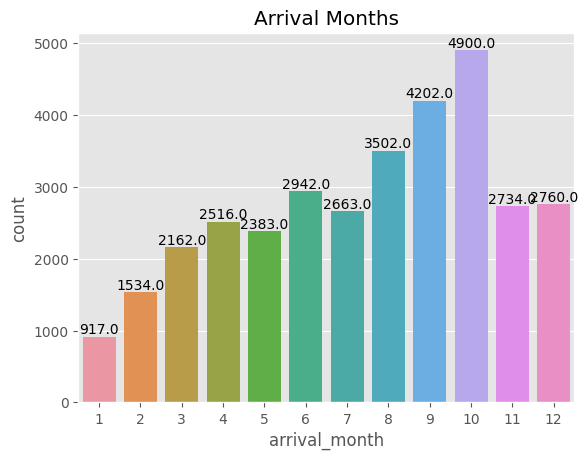

In [198]:
# Exploring the arrival month
b = sns.countplot(data=hotels, x='arrival_month')
b.set(title="Arrival Months")
count_label(b)

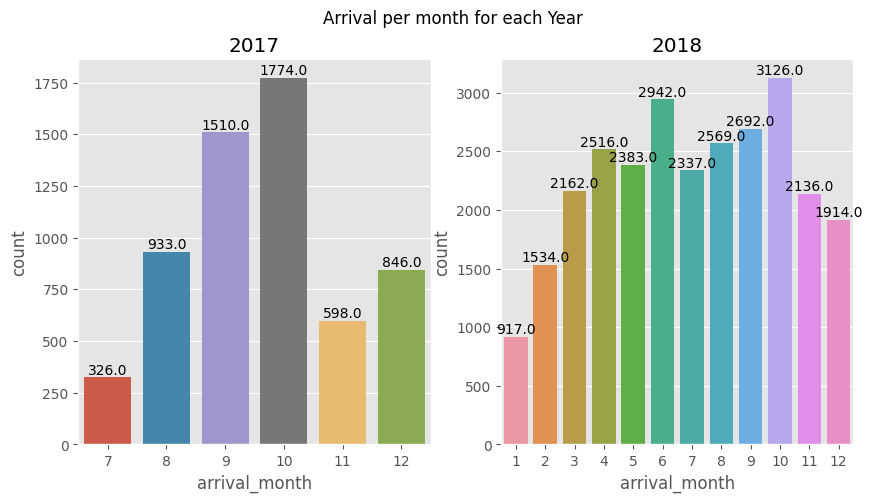

In [199]:
# is the arrival month different by year?
y2017 = hotels[hotels['arrival_year'] == 2017]
y2018 = hotels[hotels['arrival_year'] == 2018]

fig, axes = plt.subplots(1,2, figsize=(10,5))
c = sns.countplot(data=y2017, x='arrival_month', ax=axes[0])
d = sns.countplot(data=y2018, x='arrival_month', ax=axes[1])
c.set_title(2017)
d.set_title(2018)

fig.suptitle("Arrival per month for each Year")

# to display the count of each bar
count_label(c)
count_label(d)

Text(0.5, 1.0, 'Total Booking')

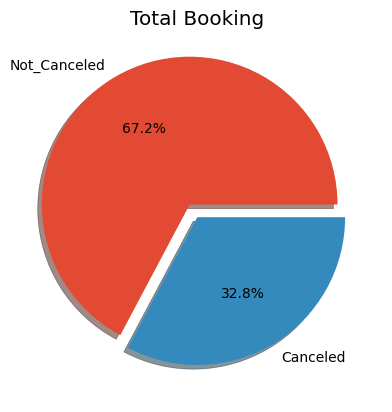

In [200]:
# Exploring the target variable
df = hotels.booking_status.value_counts()

# Creating the percentage label function for pie charts
def func(pct):
  return "{:1.1f}%".format(pct)
 
plt.pie(df.values, labels=df.index, autopct=lambda pct: func(pct), shadow=True, explode=(0.1, 0.0))
plt.title('Total Booking')

In [201]:
# Total number of customers (both canceled ands not canceled)
children = hotels.no_of_children.sum()
adults = hotels.no_of_adults.sum()
hotels_vis_sum = children + adults
print("Total number of visitors: ", hotels_vis_sum)
print("Total number of children: ", children)
print("Total number of adults: ", adults)


Total number of visitors:  64262
Total number of children:  3469
Total number of adults:  60793


Text(0.5, 0.98, 'Is there a difference in cancellation between adults only and children involved?')

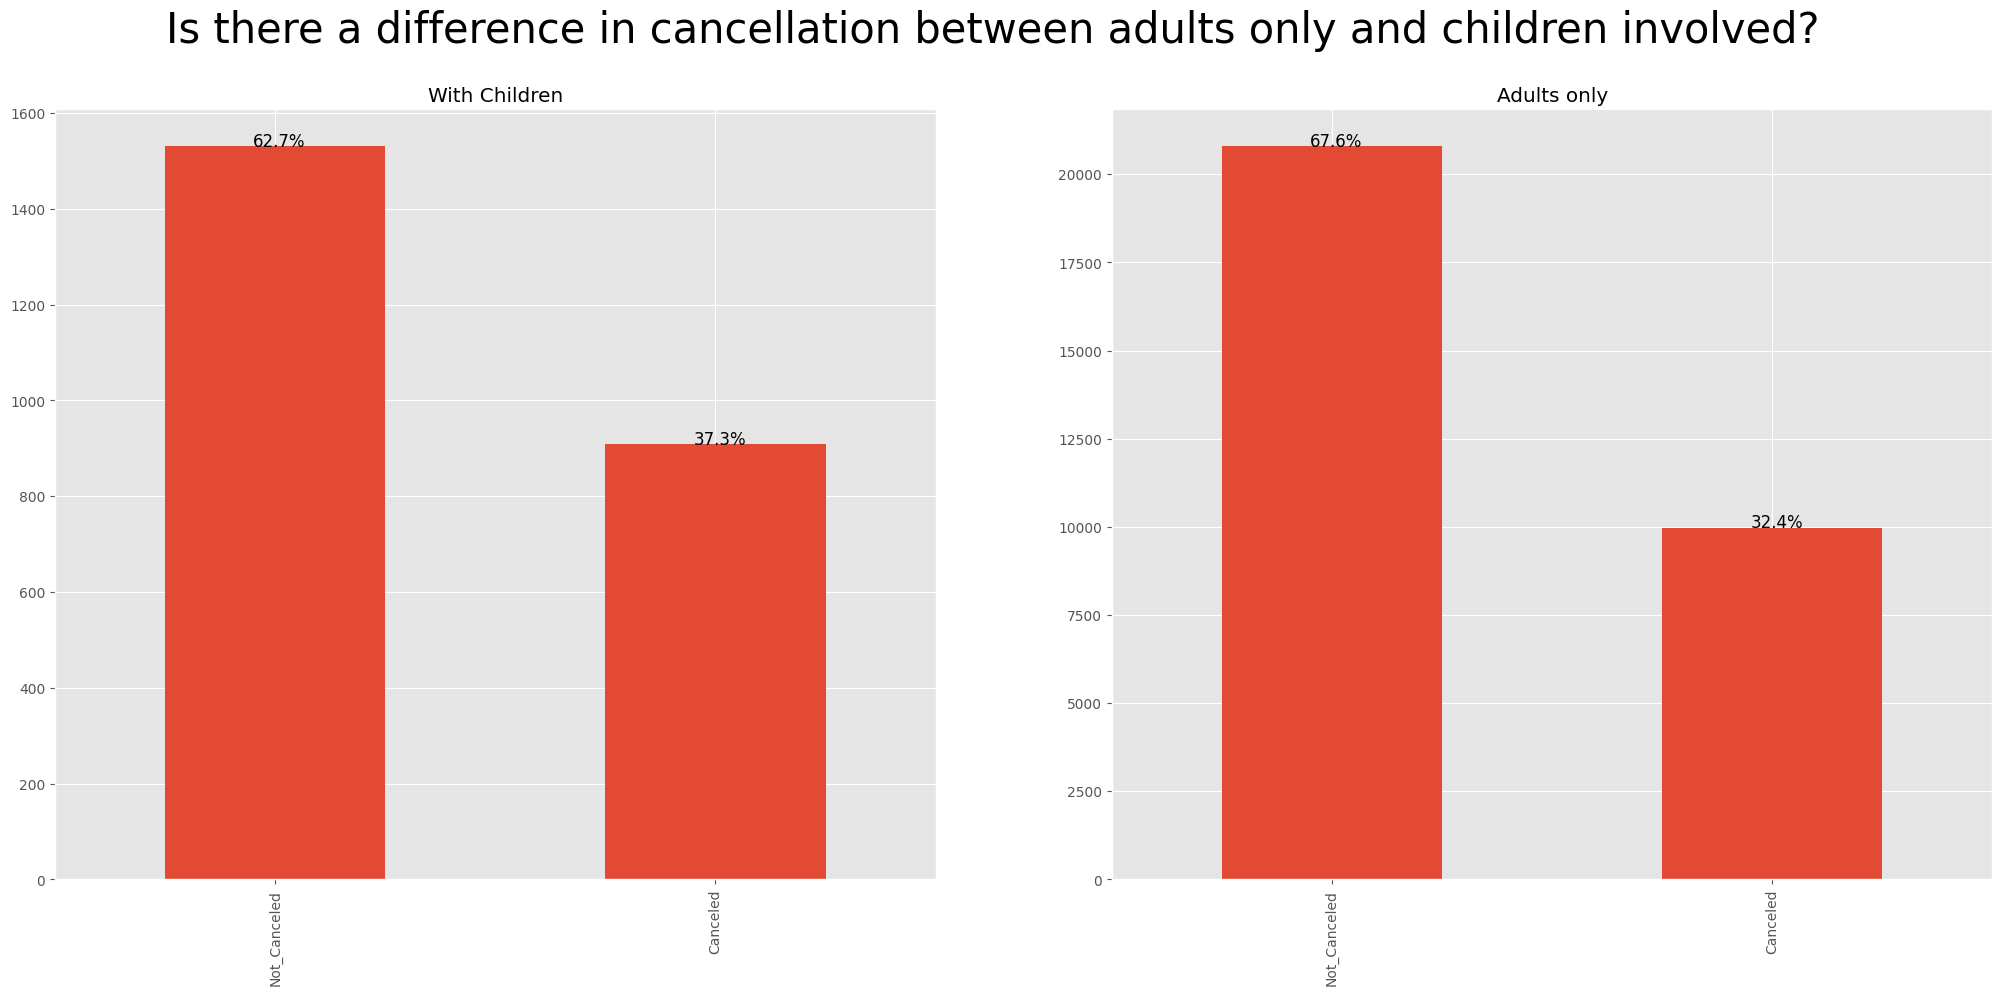

In [202]:
# Is there a difference in cancellation between adults only and children involved?
with_children = hotels[hotels['no_of_children'] > 0]
adults_only = hotels[hotels['no_of_children'] == 0]

fig, axes = plt.subplots(1,2,figsize=(25,10))
j = with_children.booking_status.value_counts().plot(kind='bar', ax=axes[0], title="With Children")
k = adults_only.booking_status.value_counts().plot(kind='bar', ax=axes[1], title="Adults only")

count_pct(j, with_children.shape[0])
count_pct(k, adults_only.shape[0])

plt.suptitle("Is there a difference in cancellation between adults only and children involved?", fontsize=30)

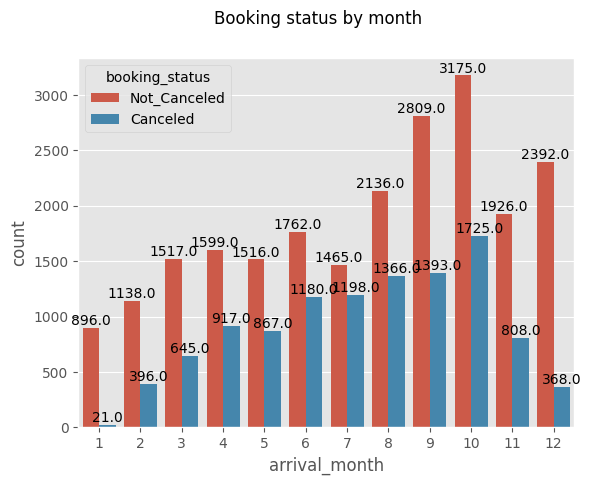

In [203]:
# Which months do people cancel the most?
f = sns.countplot(data=hotels, x='arrival_month', hue='booking_status')
plt.suptitle("Booking status by month")
count_label(f)

Average price per room:  103.4


Text(0.5, 0.98, 'Average price per room and relationship with Booking status')

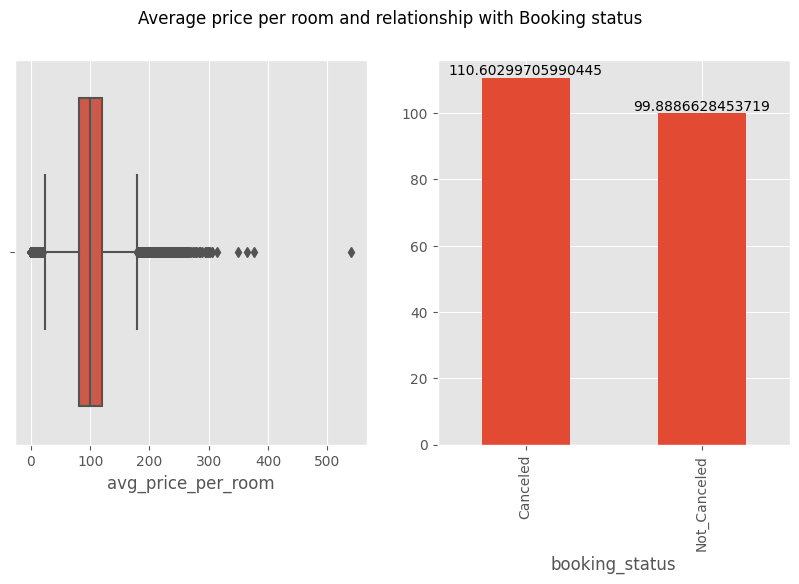

In [204]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

# What is the average price per room for people that cancelled?
g = sns.boxplot(data=hotels, x='avg_price_per_room', ax=axes[0])
print("Average price per room: ", hotels['avg_price_per_room'].mean().round(2))

# Does the average price affect cancellation?
hotel_price = hotels.groupby('booking_status')['avg_price_per_room'].mean()
h = hotel_price.plot(kind='bar')
count_label(h)

plt.suptitle("Average price per room and relationship with Booking status")

Text(0.5, 1.01, 'Relationship between categorical variables and Target (Booking Status)')

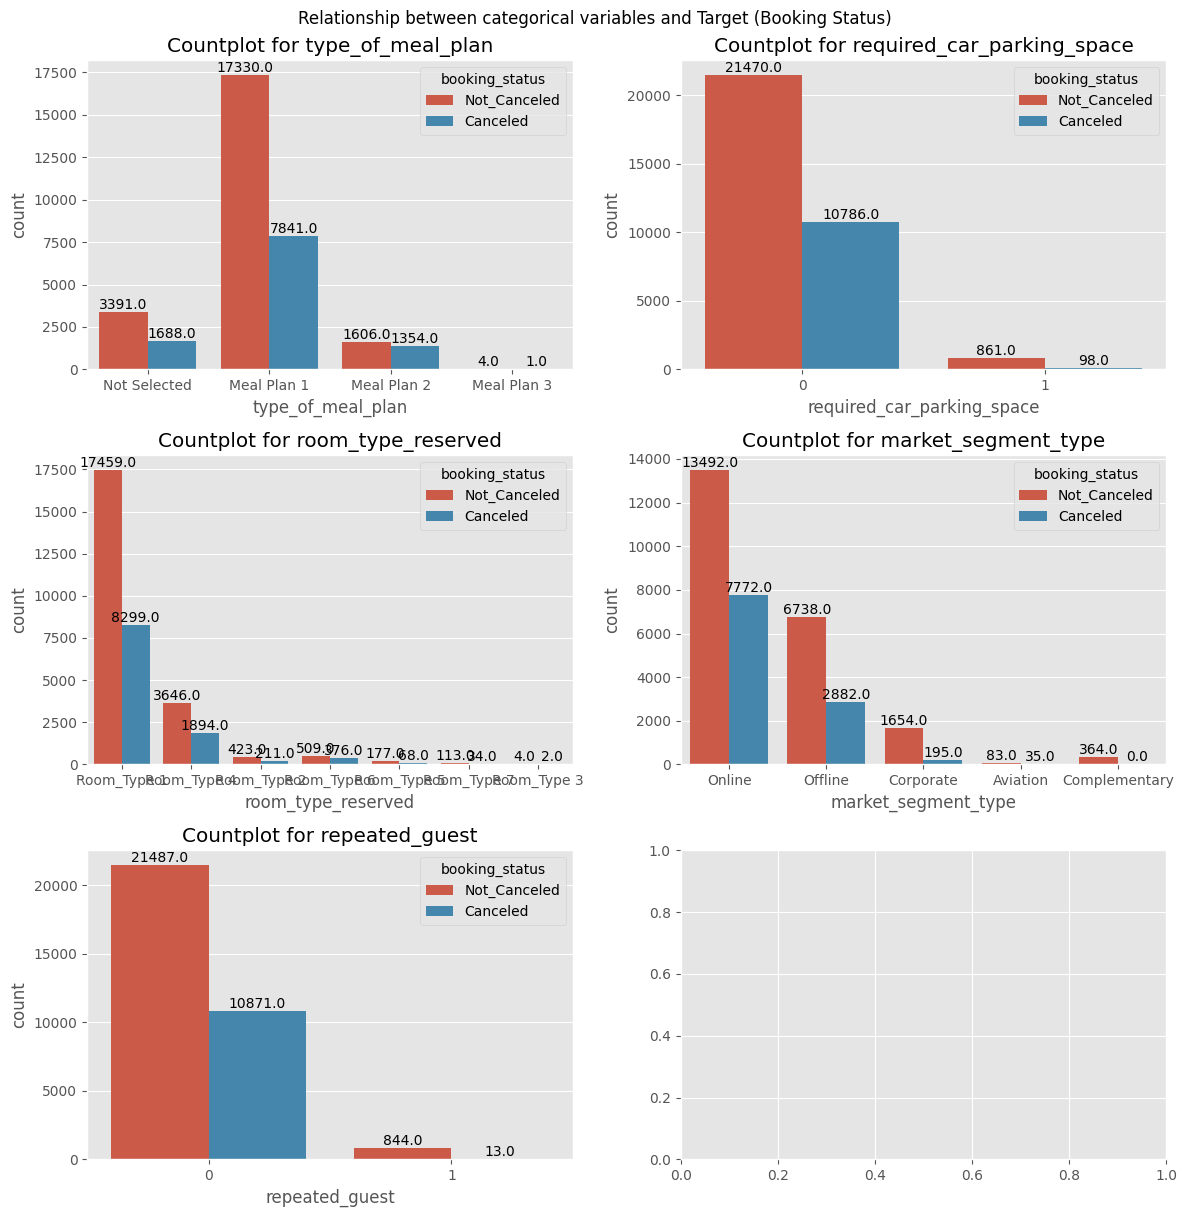

In [205]:
# Exploring the categorical columns
col = ['type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'market_segment_type', 'repeated_guest']

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
for i, col in enumerate(col):
    row_idx = i // 2  # Calculate the row index
    col_idx = i % 2  # Calculate the column index

    # Create the countplot with hue
    ax = sns.countplot(x=col, hue='booking_status', data=hotels, ax=axes[row_idx, col_idx])

    # Set the title for the subplot
    axes[row_idx, col_idx].set_title(f'Countplot for {col}')
    
    count_label(ax)

fig.tight_layout()
fig.suptitle("Relationship between categorical variables and Target (Booking Status)", y=1.01)


[Text(0.5, 1.0, 'How does lead time relate with cancellation?')]

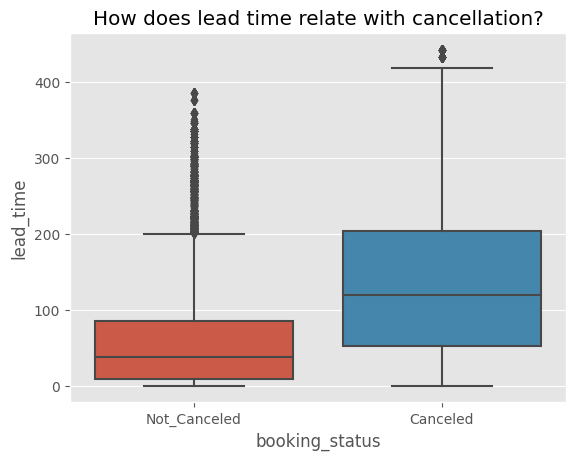

In [206]:
# how does lead time affect cancellation?
sns.boxplot(data=hotels, y='lead_time', x='booking_status').set(title="How does lead time relate with cancellation?")

[Text(0.5, 1.0, 'Weekend Nights and Cancellation')]

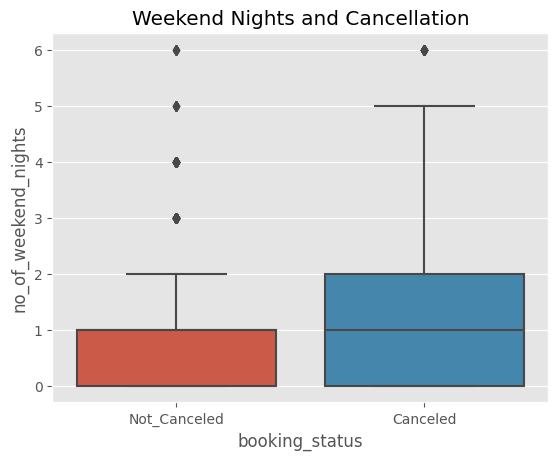

In [207]:
# how does lead time and weekend nights affect cancellation?
sns.boxplot(data=hotels, y='no_of_weekend_nights', x='booking_status').set(title="Weekend Nights and Cancellation")

[Text(0.5, 1.0, 'Special requests and cancellation')]

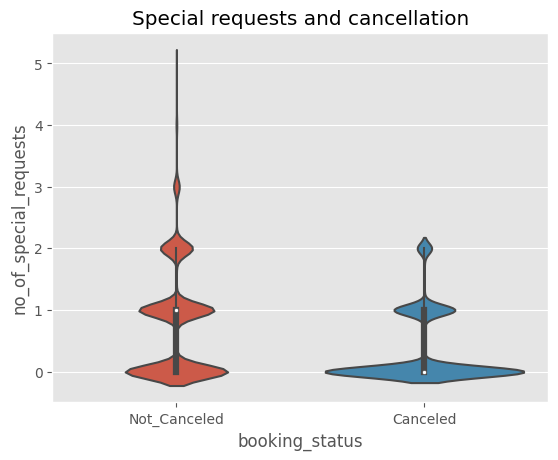

In [208]:
# how does number of special request affect cancellation?
sns.violinplot(data=hotels, y='no_of_special_requests', x='booking_status').set(title="Special requests and cancellation")

Text(0.5, 1.05, 'Do people who cancel before come back, and when do they cancel when they do?')

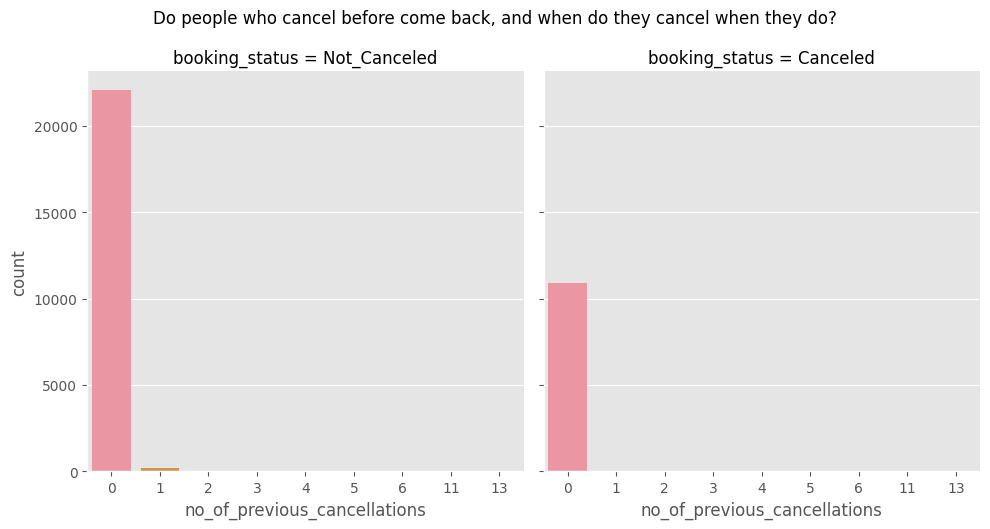

In [209]:
# Do people who cancel before come back, and when do they cancel when they do?
i = sns.catplot(data=hotels, x='no_of_previous_cancellations', col='booking_status', kind='count')
plt.suptitle("Do people who cancel before come back, and when do they cancel when they do?", y=1.05)

In [210]:
hotels_corr = hotels.corr()
hotels_corr

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.015202,0.101329,0.096063,0.014505,0.095006,0.075517,0.020085,0.025964,-0.182963,-0.044217,-0.112603,0.282417,0.179060
no_of_children,-0.015202,1.000000,0.025886,0.024173,0.033421,-0.047093,0.047325,-0.005243,0.019541,-0.036083,-0.016177,-0.020783,0.334063,0.120907
no_of_weekend_nights,0.101329,0.025886,1.000000,0.178030,-0.029650,0.046056,0.055660,-0.012964,0.025400,-0.067085,-0.020344,-0.025210,-0.003119,0.058565
no_of_week_nights,0.096063,0.024173,0.178030,1.000000,-0.043539,0.139503,0.032099,0.034937,-0.009378,-0.096883,-0.029908,-0.046963,0.023537,0.045118
required_car_parking_space,0.014505,0.033421,-0.029650,-0.043539,1.000000,-0.060948,0.019112,-0.019350,-0.000062,0.102357,0.029364,0.061693,0.062838,0.084387
lead_time,0.095006,-0.047093,0.046056,0.139503,-0.060948,1.000000,0.144414,0.136261,0.007145,-0.134861,-0.044129,-0.076399,-0.061324,-0.094934
arrival_year,0.075517,0.047325,0.055660,0.032099,0.019112,0.144414,1.000000,-0.340482,0.018173,-0.021008,0.002557,0.026549,0.180619,0.050890
arrival_month,0.020085,-0.005243,-0.012964,0.034937,-0.019350,0.136261,-0.340482,1.000000,-0.041019,0.003402,-0.035563,-0.007209,0.051964,0.108974
arrival_date,0.025964,0.019541,0.025400,-0.009378,-0.000062,0.007145,0.018173,-0.041019,1.000000,-0.016975,-0.012750,-0.000828,0.015385,0.023623
repeated_guest,-0.182963,-0.036083,-0.067085,-0.096883,0.102357,-0.134861,-0.021008,0.003402,-0.016975,1.000000,0.388103,0.532057,-0.174270,-0.012642


[Text(0.5, 1.0, 'Correlation between the variables')]

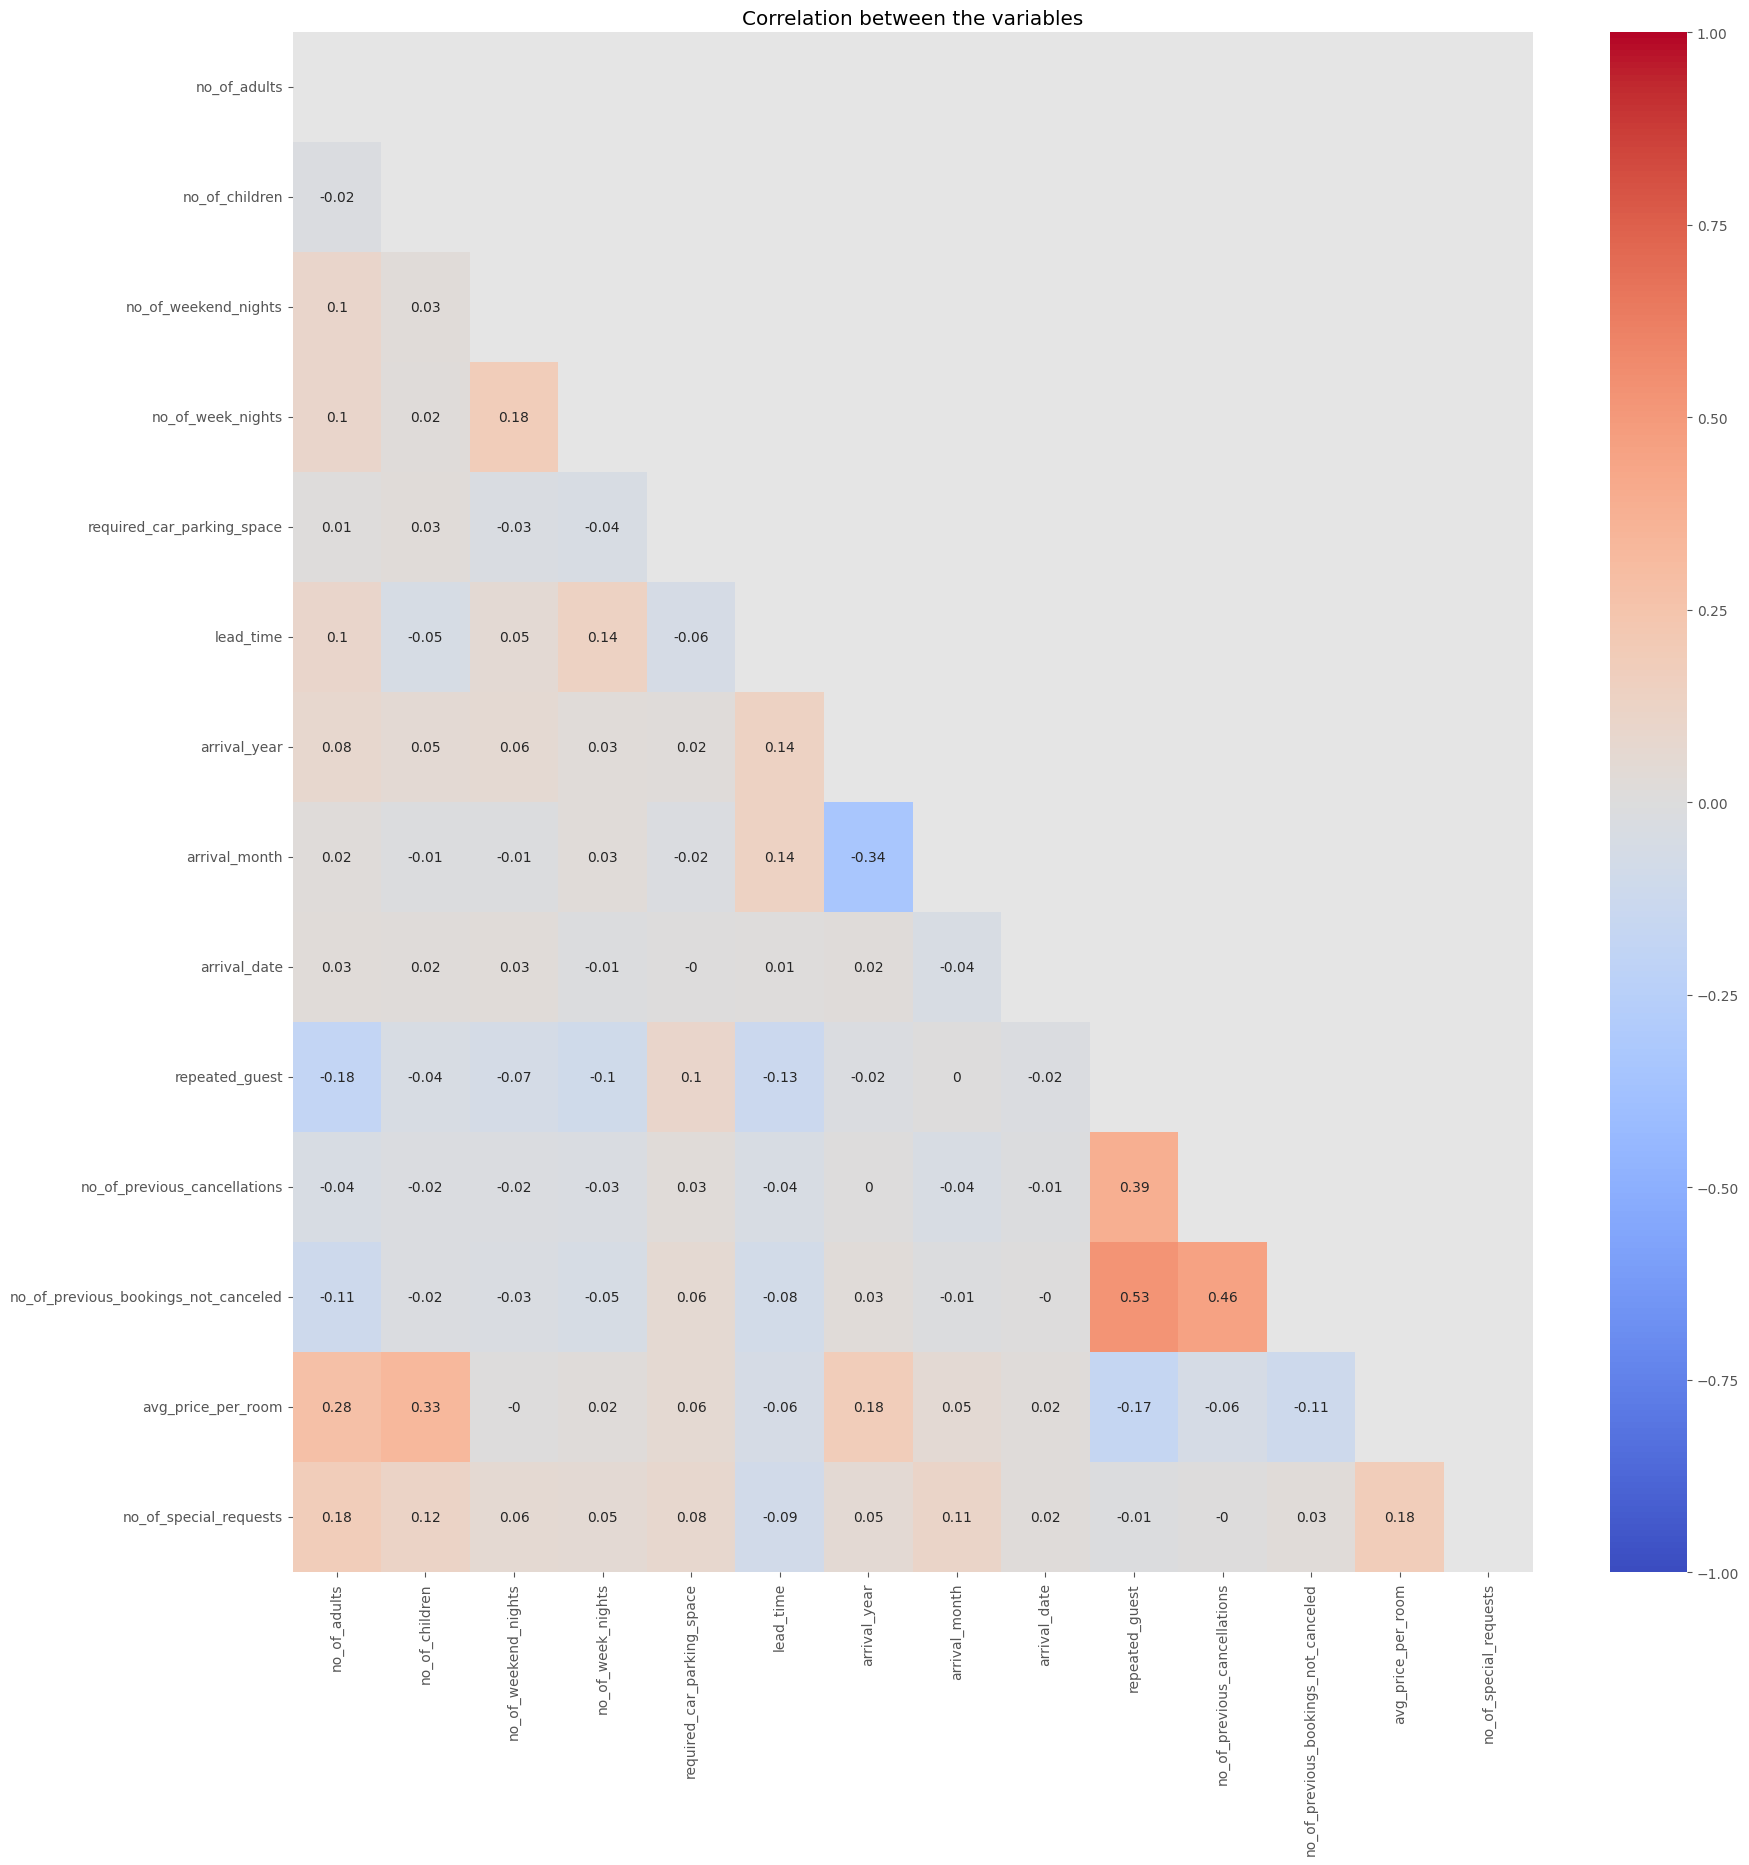

In [211]:
# mask
mask = np.triu(hotels_corr)

# heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(hotels_corr.round(2), vmax=1, vmin=-1, center=0, annot=True, mask=mask, cmap='coolwarm').set(title="Correlation between the variables")

# Model Development

## Preparation for modeling:

I dropped the Booking ID column as it an just an index column, and used Label Encoder to conver all categorical variables to numeric. I also used Standard Scaler to scale my variables.

## Model Fitting

The aim of the project is to predict potential cancellations. Since we have a target variable, this is a classification problem in supervised machine learning. To tackle this, I will be using **ensemble learning**. The base classifiers are Logistic Regression, KNN, Random Forest Classifier and Linear SVC. LR, KNN and RF are all popular binary classifiers, I added Linear SVC to practice what I learned recently. I will then use the Voting Classifier model to select the best fit for the model.

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [213]:
# Booking ID is index col
hotels_ml = hotels.drop(columns='Booking_ID')
hotels_ml.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
5,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.00,1,Canceled


In [214]:
# Converting the categorical variables to numeric
le = LabelEncoder()
cat_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type','booking_status']

for col in cat_cols:
    hotels_ml[col] = le.fit_transform(hotels_ml[col])

hotels_ml.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0
5,2,0,0,2,1,0,0,346,2018,9,13,4,0,0,0,115.00,1,0


In [215]:
X = hotels_ml.drop(columns='booking_status').values
y = hotels_ml['booking_status'].values

y[:10]

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [216]:
# Balancing the target variable
sm = SMOTE()
x_data,y_data = sm.fit_resample(X,y)

from collections import Counter
Counter(y_data)


Counter({1: 22331, 0: 22331})

In [220]:
# set a seed
np.random.seed(100)
# Splitting the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=7)

# Scaling the data
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

print(round(x_train.mean()), round(x_train.var()))

0 1


In [221]:
# Preparing Ensemble algorithms
lr = LogisticRegression()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier(random_state=11)
svc = SVC(kernel='linear')

classifiers = [('Logistic Regression', lr),
                ('K Neighbors Classifier', knn),
                ('Random Forest Classifier', rfc),
                ('Linear SVM', svc)]

# Iterate over the defined classifiers to fit, predict and score the models
for clf_name, clf in classifiers:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    # Evaluate the accuracy of clf on the test set
    print(f"{clf_name}: {round(accuracy_score(y_test, y_pred)*100, 2)} %")


Logistic Regression: 76.81 %
K Neighbors Classifier: 84.65 %
Random Forest Classifier: 88.06 %
Linear SVM: 77.13 %


In [219]:
# instantiate, fit and predict the Voting classifier
vc = VotingClassifier(estimators=classifiers)
vc.fit(x_train, y_train)
y_pred = vc.predict(x_test)

# Evaluate the Voting classifier
print(f"Voting Classifier: {round(accuracy_score(y_test, y_pred)*100, 2)} %")

Voting Classifier: 83.1 %


## Model Evaluation

I will be using accuracy score to compare the model performances. Accuracy focuses on the correct predictions relative to all predictions, thus it is easier to interpret and explain to an audience.

The accuracy of the Logistic Regression model is 76.1%, KNN is 84.7%, Random Forest is 88.1% while that of the Linear SVC is 77.1, This means that the Random Forest is able to predicts more correctly whether a visitor making a reservation will cancel or not. The VotingClassifier gave has a score of 83.1% which is lower than that of the KNN. This may be because of the significantly better accuracy of the Random Forest model compared to the others.

From this result of the evaluation, the Random Forest Classifier model is the best performing model.